## Imports

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as numpy


Using TensorFlow backend.


## Load the MNIST data

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


## Let's look at 10 of the images

In [ ]:
import matplotlib.pyplot as plt

n = 10 # the amount of images we want to display

plt.figure(figsize=(20,4))

for i in range(n):
    subplot = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    subplot.get_xaxis().set_visible(False)
    subplot.get_yaxis().set_visible(False)

plt.show()

## Reshape all the images

In [58]:
x_train_stacked = [train.reshape(1,784) for train in x_train]
x_test_stacked = [test.reshape(1,784) for test in x_test]
train_samples = len(x_train)
test_samples = len(x_test)
print(train_samples)
#x_train = [train.reshape(28,28,1) for train in x_train]
#x_test = [test.reshape(28,28,1) for test in x_test]
x_train = x_train.reshape(train_samples,28,28,1)
x_test = x_test.reshape(test_samples,28,28,1)
# Verify that it worked
print(x_test_stacked[1].shape)
print(x_test.shape)

60000
(1, 784)
(10000, 28, 28, 1)


## Buildning the encoding part of the Convolutional Neural Network (CNN)

### 1. Define the input shape

In [5]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

# Let's first define that our input images will always be of size (28,28)
input_img = Input(shape=(28,28,1))

### 2. Conv layer 1

In [6]:
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

### 3. Conv layer 2

In [7]:
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

### 4. Conv layer 3

In [8]:
x = Conv2D(filters = 8, kernel_size=(3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

### 5. Decoding steps, layer 1

In [9]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

### 6. Decoding layer 2

In [10]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

### 7. Decoding layer 3

In [11]:
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

## Time to create the model

In [12]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

## Train the model

In [56]:
print(x_train.shape)
autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test)
               )

(60000, 28, 28, 1)
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 57s 952us/step - loss: -480274601913290186094018560.0000 - val_loss: -1151295666315120668653387776.0000
Epoch 2/25
60000/60000 [==============================] - 55s 915us/step - loss: -485629285791135796132052992.0000 - val_loss: -1164320014937875715545104384.0000
Epoch 3/25
60000/60000 [==============================] - 59s 976us/step - loss: -491006707686507717347770368.0000 - val_loss: -1177404335489898930874875904.0000
Epoch 4/25
60000/60000 [==============================] - 57s 945us/step - loss: -496407464309764052515553280.0000 - val_loss: -1190549463357820131088531456.0000
Epoch 5/25
60000/60000 [==============================] - 54s 904us/step - loss: -501832745874347238229016576.0000 - val_loss: -1203757740835415021840236544.0000
Epoch 6/25
60000/60000 [==============================] - 54s 905us/step - loss: -507282204440230099918258176.0000 - val_

## Test

[[[1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]]

 [[1.]
  [

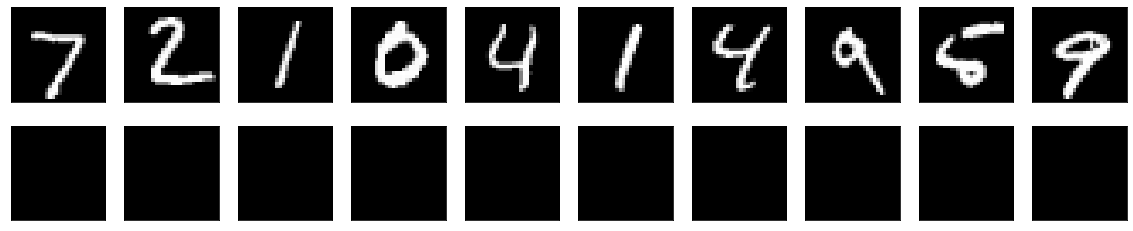

In [59]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Create noise data

In [44]:
from createNoise import noisy
import numpy as np

x_train_gauss = np.copy(x_train)
x_train_sp = np.copy(x_train)
x_train_speckle = np.copy(x_train)
x_train_poisson = np.copy(x_train)
for idx,im in enumerate(x_train):
    x_train_gauss[idx] = noisy('gauss', x_train[idx])
    #print(x_train[idx].size)
    #x_train_sp[idx] = noisy('s&p', x_train[idx])
    x_train_speckle[idx] = noisy('speckle', x_train[idx])
    x_train_poisson[idx] = noisy('poisson', x_train[idx])




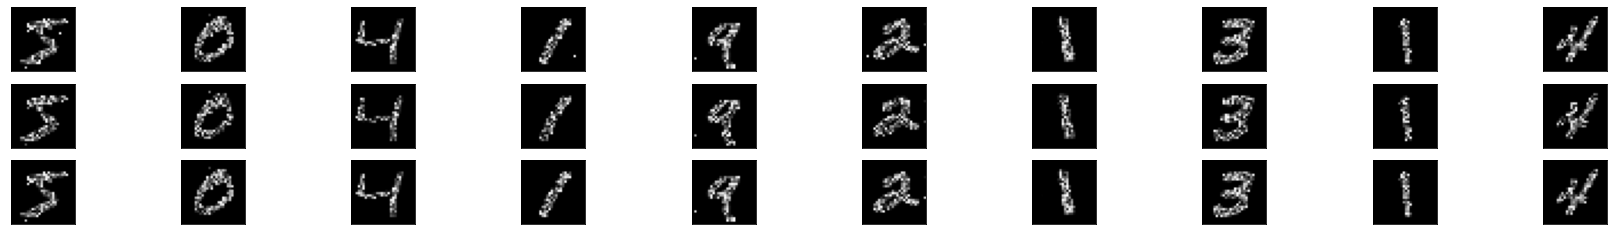

In [45]:
n = 10

plt.figure(figsize=(30, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_train_gauss[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(x_train_speckle[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    ax = plt.subplot(3, n, i+1+2*n)
    plt.imshow(x_train_poisson[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [47]:
gaussEncoder = autoencoder.fit(x_train_gauss, x_train,
                epochs=15,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test)
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 51s 850us/step - loss: -92757849262359695174139904.0000 - val_loss: -222100213645550013464444928.0000
Epoch 2/15
60000/60000 [==============================] - 51s 848us/step - loss: -96333827801902036425900032.0000 - val_loss: -230522493762427441945509888.0000
Epoch 3/15
60000/60000 [==============================] - 49s 813us/step - loss: -99919066154409242828734464.0000 - val_loss: -238972661932628662728785920.0000
Epoch 4/15
60000/60000 [==============================] - 48s 805us/step - loss: -103515919929746497541767168.0000 - val_loss: -247452831297095533202505728.0000
Epoch 5/15
60000/60000 [==============================] - 51s 850us/step - loss: -107123217710473777235623936.0000 - val_loss: -255962611670297427702710272.0000
Epoch 6/15
60000/60000 [==============================] - 50s 839us/step - loss: -110742275315143709565124608.0000 - val_loss: -26450270314306542395

In [48]:

speckleEncoder = autoencoder.fit(x_train_speckle, x_train,
                epochs=15,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test)
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 52s 869us/step - loss: -136366423746468462528036864.0000 - val_loss: -351093358073020569914179584.0000
Epoch 2/15
60000/60000 [==============================] - 52s 871us/step - loss: -139596754279107351359258624.0000 - val_loss: -359369938957772458557440000.0000
Epoch 3/15
60000/60000 [==============================] - 53s 880us/step - loss: -142838116181144103007813632.0000 - val_loss: -367680472299855796993261568.0000
Epoch 4/15
60000/60000 [==============================] - 51s 858us/step - loss: -146092089153035117801766912.0000 - val_loss: -376027207893692640430915584.0000
Epoch 5/15
60000/60000 [==============================] - 52s 871us/step - loss: -149358675437904427028054016.0000 - val_loss: -384411108039513043988643840.0000
Epoch 6/15
60000/60000 [==============================] - 53s 885us/step - loss: -152638707662749962271195136.0000 - val_loss: -39283423198425143

In [52]:
print(x_train.shape)
poissonEncoder = autoencoder.fit(x_train_poisson, x_train,
                epochs=15,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test)
               )

(60000, 28, 28, 1)
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 51s 857us/step - loss: -401053490384097968887169024.0000 - val_loss: -963518598710395776456982528.0000
Epoch 2/15
60000/60000 [==============================] - 52s 875us/step - loss: -406030805194577915085324288.0000 - val_loss: -975632946367428858623295488.0000
Epoch 3/15
60000/60000 [==============================] - 54s 898us/step - loss: -411031024899209749982085120.0000 - val_loss: -987806603641830352397271040.0000
Epoch 4/15
60000/60000 [==============================] - 55s 917us/step - loss: -416054783475693743301984256.0000 - val_loss: -1000046015855494049910751232.0000
Epoch 5/15
60000/60000 [==============================] - 56s 932us/step - loss: -421103922981459266721808384.0000 - val_loss: -1012344537930424203905859584.0000
Epoch 6/15
60000/60000 [==============================] - 54s 904us/step - loss: -426174467754546977392558080.0000 - val_los

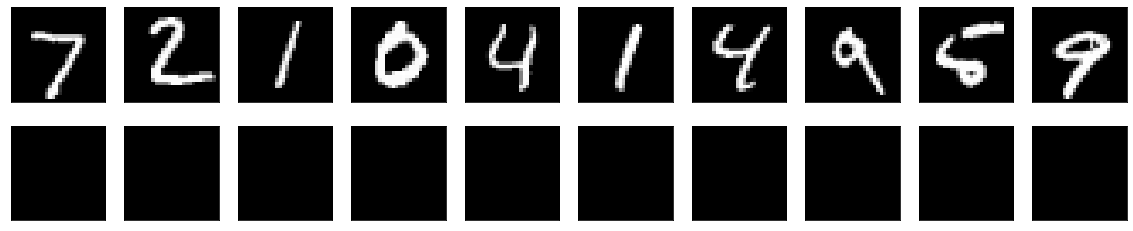

In [55]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()